In [358]:
%matplotlib inline
import numpy as np 
import pandas as pd 
import plotly.graph_objs as go
from plotly import tools
import seaborn as sns
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

## Imports

In [359]:
df = pd.read_csv('/Users/jeffbloom13/WPI/DS504/week-7/201703-citibike-tripdata.csv')
weatherDf = pd.read_csv('/Users/jeffbloom13/WPI/DS504/week-7/NYCWeatherClean.csv')


In [360]:
df.head(10)

,Trip Duration,Start Time,Stop Time,Start Station ID,Start Station Name,Start Station Latitude,Start Station Longitude,End Station ID,End Station Name,End Station Latitude,End Station Longitude,Bike ID,User Type,Birth Year,Gender
0,1893,2017-03-01 00:00:32,2017-03-01 00:32:06,2009,Catherine St & Monroe St,40.711174,-73.996826,527,E 33 St & 2 Ave,40.744023,-73.976056,27291,Subscriber,1973.0,2
1,223,2017-03-01 00:01:09,2017-03-01 00:04:53,127,Barrow St & Hudson St,40.731724,-74.006744,284,Greenwich Ave & 8 Ave,40.739017,-74.002638,19387,Subscriber,1985.0,2
2,1665,2017-03-01 00:01:27,2017-03-01 00:29:12,174,E 25 St & 1 Ave,40.738177,-73.977387,307,Canal St & Rutgers St,40.714275,-73.989900,15809,Subscriber,1988.0,1
3,100,2017-03-01 00:01:29,2017-03-01 00:03:10,316,Fulton St & William St,40.709560,-74.006536,306,Cliff St & Fulton St,40.708235,-74.005301,18956,Subscriber,1991.0,1
4,1229,2017-03-01 00:01:33,2017-03-01 00:22:02,536,1 Ave & E 30 St,40.741444,-73.975361,259,South St & Whitehall St,40.701221,-74.012342,25728,Subscriber,1963.0,1
5,613,2017-03-01 00:01:57,2017-03-01 00:12:11,259,South St & Whitehall St,40.701221,-74.012342,276,Duane St & Greenwich St,40.717488,-74.010455,16257,Subscriber,1984.0,1
6,157,2017-03-01 00:02:12,2017-03-01 00:04:49,3329,Degraw St & Smith St,40.682915,-73.993182,3384,Smith St & 3 St,40.678724,-73.995991,26868,Subscriber,1963.0,1
7,233,2017-03-01 00:02:15,2017-03-01 00:06:08,3107,Bedford Ave & Nassau Ave,40.723117,-73.952123,3090,N 8 St & Driggs Ave,40.717746,-73.956001,21657,Subscriber,1976.0,1
8,317,2017-03-01 00:02:38,2017-03-01 00:07:55,3328,W 100 St & Manhattan Ave,40.795000,-73.964500,3285,W 87 St & Amsterdam Ave,40.788390,-73.974700,26933,Subscriber,1981.0,1
9,2042,2017-03-01 00:02:54,2017-03-01 00:36:57,128,MacDougal St & Prince St,40.727103,-74.002971,3289,W 90 St & Amsterdam Ave,40.790179,-73.972889,25371,Subscriber,1964.0,1


## Clean data

In [361]:
df.isna().sum()

Trip Duration                  0
Start Time                     0
Stop Time                      0
Start Station ID               0
Start Station Name             0
Start Station Latitude         0
Start Station Longitude        0
End Station ID                 0
End Station Name               0
End Station Latitude           0
End Station Longitude          0
Bike ID                        0
User Type                   5136
Birth Year                 32846
Gender                         0
dtype: int64

In [362]:
df_wo_na = df.dropna()


In [363]:
df['Birth Year'].apply(lambda y: y + 100 if y < 1918 else y)
df = df.reset_index(drop=True)

In [364]:
from sklearn import neighbors
knn = neighbors.KNeighborsRegressor(10, weights='distance')
for col in ['Start Time', 'Stop Time']:
    df_wo_na[col] = df_wo_na[col].apply(lambda x: pd.Timestamp(x).value)
for col in ['Start Station Name', 'End Station Name', 'User Type']:
    df_wo_na[col] = pd.Categorical(df_wo_na[col]).codes
knn.fit(df_wo_na.drop(['Birth Year'], axis=1).values, df_wo_na['Birth Year'].values)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                    weights='distance')

In [365]:
nan_by = df[df['Birth Year'].isnull()]
for col in ['Start Time', 'Stop Time']:
    nan_by[col] = nan_by[col].apply(lambda x: pd.Timestamp(x).value)
for col in ['Start Station Name', 'End Station Name', 'User Type']:
    nan_by[col] = pd.Categorical(nan_by[col]).codes
nan_by = nan_by.drop(['Birth Year'], axis=1)
nan_by['Birth Year'] = knn.predict(nan_by)
df.loc[df['Birth Year'].isnull(), 'Birth Year'] = nan_by['Birth Year'].astype(int)
df['age'] = df['Birth Year'].apply(lambda y: 2017 - y)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [366]:
df.isna().sum()
df = df.dropna()
df.isna().sum()


Trip Duration              0
Start Time                 0
Stop Time                  0
Start Station ID           0
Start Station Name         0
Start Station Latitude     0
Start Station Longitude    0
End Station ID             0
End Station Name           0
End Station Latitude       0
End Station Longitude      0
Bike ID                    0
User Type                  0
Birth Year                 0
Gender                     0
age                        0
dtype: int64

In [367]:

customer_type_df = pd.DataFrame(data=df['User Type'].value_counts())
customer_type_df = customer_type_df.reset_index()
customer_type_df.rename(columns={'User Type':'count', 'index': 'type'}, inplace=True)

In [368]:
layout = go.Layout(
    title='User Type',
)
trace = go.Pie(labels=customer_type_df['type'].values, values=customer_type_df['count'].values)
fig = go.Figure(data=[trace], layout=layout)
iplot(fig)

In [369]:
y = list(range(0, 110, 10))
men_bins = []
women_bins = []
for i in range(0, len(y) - 1):
    df_gender = pd.DataFrame(data=df[( df['age'] >  y[i] ) & (df['age'] < y[i+1]) ]['Gender'].value_counts())
    df_gender = df_gender.reset_index()
    df_gender.rename(columns={'Gender':'count', 'index':'gender'}, inplace=True)
    count = df_gender[df_gender['gender'] == 1]['count']
    men_bins.append(0 if len(count) == 0 else count.values[0])
    count2 = df_gender[df_gender['gender'] == 2]['count']
    women_bins.append(0 if len(count2) == 0 else -count2.values[0])
    
layout = go.Layout(yaxis=go.layout.YAxis(title='Age'),
                  title="Gender",
                   barmode='overlay',
                   bargap=0.1)

data = [
        go.Bar(y=y,
               x=women_bins,
               orientation='h',
               name='Women',
               text=-1 * women_bins,
               hoverinfo='text',
               marker=dict(color='purple')
               ),go.Bar(y=y,
               x=men_bins,
               orientation='h',
               name='Men',
               hoverinfo='x',
               marker=dict(color='plum')
               )]
iplot(dict(data=data, layout=layout)) 

In [370]:
df['Start Time'] = df['Start Time'].apply(pd.to_datetime)
def extract_part_of_day(hour):
    if hour < 4:
        return 'early morning'
    if hour < 10:
        return 'morning'
    if hour < 14:
        return 'noon'
    if hour < 18:
        return 'afternoon'
    return 'evening'
df['part_of_day'] = df['Start Time'].apply(lambda t: extract_part_of_day(t.hour))

In [371]:
df_station_end = df.groupby(['End Station ID', 'End Station Name', 'End Station Latitude', 'End Station Longitude']).count().reset_index()[['End Station ID', 'End Station Name', 'End Station Latitude', 'End Station Longitude', 'age']]
df_station_end.rename(columns={
    'End Station ID': 'id',
    'End Station Name': 'name',
    'End Station Latitude':'lat',
    'End Station Longitude': 'lon'
}, inplace= True)
df_station_start = df.groupby(['Start Station ID', 'Start Station Name', 'Start Station Latitude', 'Start Station Longitude']).count().reset_index()[['Start Station ID', 'Start Station Name', 'Start Station Latitude', 'Start Station Longitude', 'age']]
df_station_start.rename(columns={
    'Start Station ID': 'id',
    'Start Station Name': 'name',
    'Start Station Latitude':'lat',
    'Start Station Longitude': 'lon'
}, inplace= True)

df_paths = df.groupby(['End Station ID', 'End Station Name', 'End Station Latitude', 'End Station Longitude','Start Station ID', 'Start Station Name', 'Start Station Latitude', 'Start Station Longitude']).count().reset_index()

In [372]:
mapbox_access_token = 'pk.eyJ1Ijoiam1ibG9vbSIsImEiOiJja2Y1cm1maHUwYjNnMnBxN3pqcGZqNjd4In0.7r3hp8Vj1efich43hkUaDQ'


data = []
data.append(go.Scattermapbox(
        lat=df_station_start['lat'].values,
        lon=df_station_start['lon'].values,
        mode='markers',
        marker=dict(
                size=9
        ),
         text=df_station_start['name'].values
    ))
for i in range(len(df_paths)//2 - 1, len(df_paths)//2-100, -1):
     data.append(go.Scattermapbox(
        lat=[df_paths['Start Station Latitude'][i], df_paths['End Station Latitude'][i]],
        lon=[ df_paths['Start Station Longitude'][i], df_paths['End Station Longitude'][i]],
        mode='lines',
        line = dict(
                width = 1,
                color = 'red',
            ),
    ))
layout = go.Layout(
    autosize=True,
    hovermode='closest',
    mapbox=dict(
        accesstoken=mapbox_access_token,
        bearing=0,
        center=dict(
            lat=40.76,
            lon=-73.99
        ),
        pitch=0,
        zoom=12
    ),
    showlegend = False
)


fig = dict(data=data, layout=layout)
iplot(fig, filename='Multiple Mapbox')

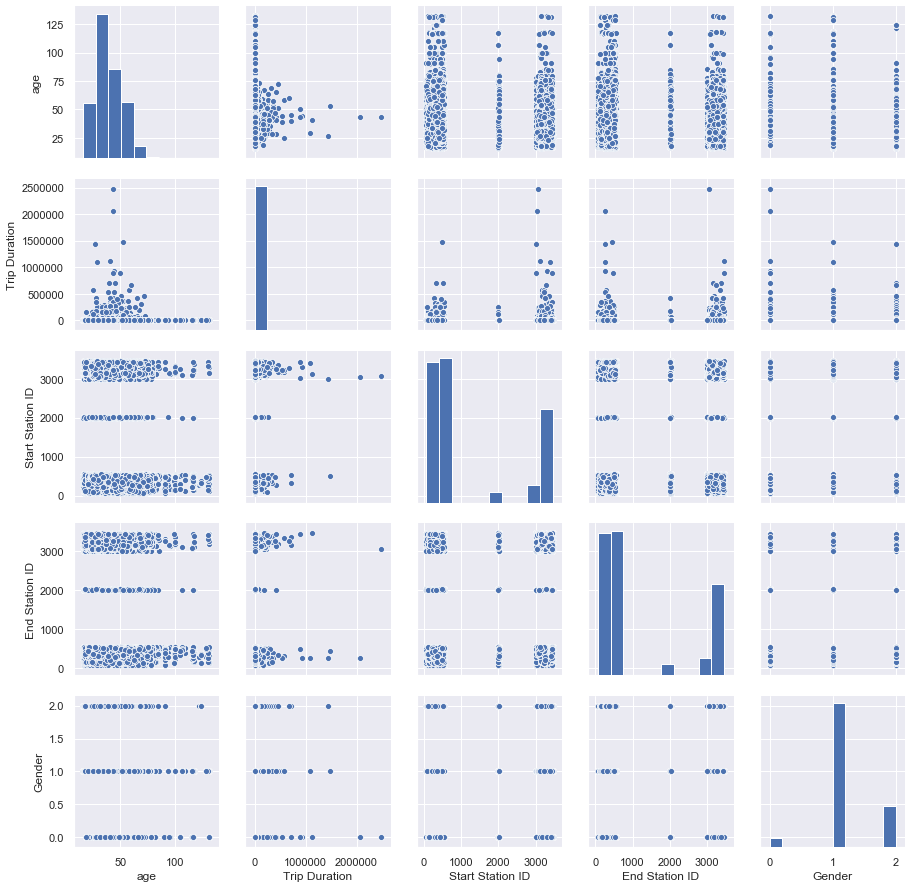

In [373]:
sns.pairplot(df[['age','Trip Duration', 'Start Station ID', 'End Station ID','Gender']])

In [374]:

df.head(5)

,Trip Duration,Start Time,Stop Time,Start Station ID,Start Station Name,Start Station Latitude,Start Station Longitude,End Station ID,End Station Name,End Station Latitude,End Station Longitude,Bike ID,User Type,Birth Year,Gender,age,part_of_day
0,1893,2017-03-01 00:00:32,2017-03-01 00:32:06,2009,Catherine St & Monroe St,40.711174,-73.996826,527,E 33 St & 2 Ave,40.744023,-73.976056,27291,Subscriber,1973.0,2,44.0,early morning
1,223,2017-03-01 00:01:09,2017-03-01 00:04:53,127,Barrow St & Hudson St,40.731724,-74.006744,284,Greenwich Ave & 8 Ave,40.739017,-74.002638,19387,Subscriber,1985.0,2,32.0,early morning
2,1665,2017-03-01 00:01:27,2017-03-01 00:29:12,174,E 25 St & 1 Ave,40.738177,-73.977387,307,Canal St & Rutgers St,40.714275,-73.989900,15809,Subscriber,1988.0,1,29.0,early morning
3,100,2017-03-01 00:01:29,2017-03-01 00:03:10,316,Fulton St & William St,40.709560,-74.006536,306,Cliff St & Fulton St,40.708235,-74.005301,18956,Subscriber,1991.0,1,26.0,early morning
4,1229,2017-03-01 00:01:33,2017-03-01 00:22:02,536,1 Ave & E 30 St,40.741444,-73.975361,259,South St & Whitehall St,40.701221,-74.012342,25728,Subscriber,1963.0,1,54.0,early morning


In [375]:
day_parts = ['early morning','morning', 'noon', 'afternoon','evening']
fig = tools.make_subplots(rows=1, cols=5, subplot_titles=day_parts)

df_station_end = df.groupby(['End Station ID', 'End Station Name', 'End Station Latitude', 'End Station Longitude','part_of_day']).count().reset_index()[['End Station ID', 'End Station Name', 'End Station Latitude', 'End Station Longitude', 'age','part_of_day']]
df_station_end.rename(columns={
    'End Station ID': 'id',
    'End Station Name': 'name',
    'End Station Latitude':'lat',
    'End Station Longitude': 'lon'
}, inplace= True)
df_station_start = df.groupby(['Start Station ID', 'Start Station Name', 'Start Station Latitude', 'Start Station Longitude','part_of_day']).count().reset_index()[['Start Station ID', 'Start Station Name', 'Start Station Latitude', 'Start Station Longitude', 'age','part_of_day']]
df_station_start.rename(columns={
    'Start Station ID': 'id',
    'Start Station Name': 'name',
    'Start Station Latitude':'lat',
    'Start Station Longitude': 'lon'
}, inplace= True)


for idx, daypart in enumerate(day_parts):
    df_start_top10 = df_station_start[df_station_start['part_of_day'] == daypart].sort_values(['age'], ascending=False).head(10)
    trace = go.Bar(
            x=df_start_top10.name,
            y=df_start_top10.age
    )
    fig.append_trace(trace, 1, idx + 1)

fig['layout'].update(title='Top 10 start station')

iplot(fig)




/opt/anaconda3/lib/python3.7/site-packages/plotly/tools.py:465: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



In [376]:
fig2 = tools.make_subplots(rows=1, cols=5, subplot_titles=day_parts)
for idx, daypart in enumerate(day_parts):
    df_start_top10 = df_station_end[df_station_end['part_of_day'] == daypart].sort_values(['age'], ascending=False).head(10)
    trace = go.Bar(
            x=df_start_top10.name,
            y=df_start_top10.age
    )
    fig2.append_trace(trace, 1, idx + 1)

fig2['layout'].update(title='Top 5 end station')

iplot(fig2)

In [377]:
#df.index = df['Start Time']
#countsPerDay = df['Start Time'].resample('D', how = ['count'])

df.index = df['Start Time'] # Set 'starttime' variable as the index
#countsPerDay = df['Start Time'].resample('D', how = ['count'])
countsPerDay = df['Start Time'].resample('D').count()

In [378]:
countsPerDay.values
#countsPerDay.head()

array([40401, 35517, 30927, 15498, 15760, 32344, 29574, 43172, 44866,
       18351, 15060, 13357, 27303,     0,     0,     0,  7029,  4073,
       10397, 27269, 36611, 26806, 29716, 33824, 28948, 19603, 26166,
       21493, 42157, 39375,  6932])

In [379]:
ndim = countsPerDay.shape[0]
ndim

31

In [380]:
# Now add count
weatherDf['count'] = 0
ndim = countsPerDay.shape[0]
for index,row in weatherDf.iterrows():
    #print('colNum=', i)
    #print('val=', df2.iloc[: , idx].values)
    #print('day=',j['Day'])
    
    print(row['Day'], row['P'])
    #row['count'] = countsPerDay['count'].values[index]
    if index < ndim:
        print('count=', countsPerDay.values[index])
       # df['count'][index] = countsPerDay['count'].values[index]
        weatherDf.loc[index,'count'] = countsPerDay.values[index]

1.0 0.0
count= 40401
2.0 0.12
count= 35517
3.0 0.0
count= 30927
4.0 0.0
count= 15498
5.0 0.0
count= 15760
6.0 0.0
count= 32344
7.0 0.0
count= 29574
8.0 0.16
count= 43172
9.0 0.0
count= 44866
10.0 0.0
count= 18351
11.0 0.24
count= 15060
12.0 0.0
count= 13357
13.0 0.0
count= 27303
14.0 0.32
count= 0
15.0 0.71
count= 0
16.0 0.0
count= 0
17.0 0.0
count= 7029
18.0 0.0
count= 4073
19.0 0.07
count= 10397
20.0 0.0
count= 27269
21.0 0.0
count= 36611
22.0 0.0
count= 26806
23.0 0.0
count= 29716
24.0 0.0
count= 33824
25.0 0.0
count= 28948
26.0 0.1
count= 19603
27.0 0.02
count= 26166
28.0 0.42
count= 21493
29.0 0.43
count= 42157
30.0 0.0
count= 39375
31.0 0.33
count= 6932


In [381]:
weatherDf

,Day,AvgTemp,AvgDP,AvgH,AvgW,AvgP,P,count
0,1,59.2,53.1,81.3,8.0,29.7,0.00,40401
1,2,48.0,23.3,38.7,10.7,29.8,0.12,35517
2,3,34.9,12.8,41.1,6.4,30.3,0.00,30927
3,4,26.7,6.2,42.8,5.5,30.5,0.00,15498
4,5,28.6,1.2,33.3,4.3,30.6,0.00,15760
5,6,36.9,17.7,47.0,5.3,30.5,0.00,32344
6,7,47.5,41.7,80.5,4.3,30.2,0.00,29574
7,8,54.7,34.0,49.6,11.5,29.9,0.16,43172
8,9,55.2,22.6,29.2,10.2,29.9,0.00,44866
9,10,37.4,25.8,66.1,7.6,29.9,0.00,18351


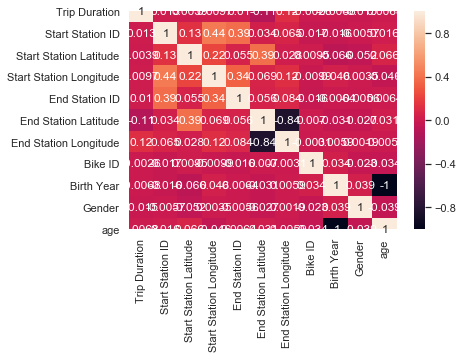

In [382]:
import matplotlib.pyplot as plt

sns.set(font_scale=1)
sns.heatmap(df.corr(), annot=True)
plt.show()

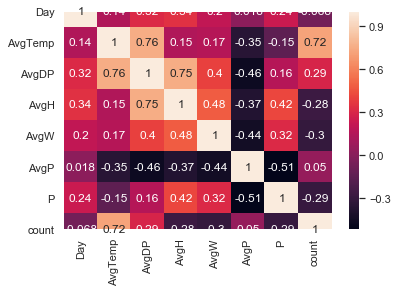

In [383]:
sns.set(font_scale=1)

sns.heatmap(weatherDf.corr(), annot=True)
plt.show()

In [384]:
# Now let's setup a test and train for the month of March 2017
from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(weatherDf.drop(columns = ['count'], axis=1), weatherDf['count'], test_size=0.3)

#X = np.array(weatherDf.drop(weatherDf[['Day', 'count']], 1))
y = np.array(weatherDf['count'])

X = np.array(weatherDf.drop(weatherDf[['Day']], 1))


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [385]:
def rmsle(y, y_):
    log1 = np.nan_to_num(np.array([np.log(v + 1) for v in y]))
    log2 = np.nan_to_num(np.array([np.log(v + 1) for v in y_]))
    calc = (log1 - log2) ** 2
    return np.sqrt(np.mean(calc))

In [386]:
from sklearn.linear_model import LinearRegression
clfL = LinearRegression(normalize= True)
clfL.fit(X_train, y_train)
print("Linear regression accuracy => ", clfL.score(X_test, y_test), "\nRMSLE => ", rmsle(y_test, clfL.predict(X_test)))

Linear regression accuracy =>  1.0 
RMSLE =>  1.9235771486495422e-11


In [387]:
from sklearn.tree import DecisionTreeRegressor

clfD = DecisionTreeRegressor()
clfD.fit(X_train, y_train)
print("Decision Tree accuracy => ", clfD.score(X_test, y_test), "\nRMSLE => ", rmsle(y_test, clfD.predict(X_test)))

Decision Tree accuracy =>  0.9707143110730114 
RMSLE =>  0.10055848269075164


In [388]:
from sklearn.ensemble import RandomForestRegressor

clf = RandomForestRegressor(n_estimators=200, max_depth=4, oob_score=True)
clf.fit(X_train, y_train)
print('Random Forest accuracy => ', clf.score(X_test, y_test), "\nRMSLE => ", rmsle(y_test, clf.predict(X_test)))

Random Forest accuracy =>  0.9747735672650731 
RMSLE =>  2.9909384573991433


In [389]:
clf.feature_importances_

array([0.01483455, 0.00824899, 0.00751122, 0.01801923, 0.01001448,
       0.00251856, 0.93885296])

In [390]:
weatherDf.columns

Index(['Day', 'AvgTemp', 'AvgDP', 'AvgH', 'AvgW', 'AvgP', 'P', 'count'], dtype='object')

In [391]:
dfTest = weatherDf
dfTest.drop(['count'], axis=1, inplace=True)
dfTest.columns



Index(['Day', 'AvgTemp', 'AvgDP', 'AvgH', 'AvgW', 'AvgP', 'P'], dtype='object')

In [392]:
importances = clf.feature_importances_
indices = np.argsort(importances)
features = dfTest.columns

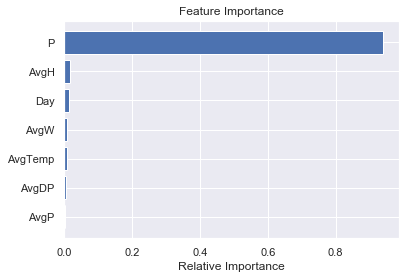

In [393]:


plt.title('Feature Importance')
#plt.barh(dfTest.columns, clf.feature_importances_.argsort())
plt.barh(range(len(indices)), importances[indices])

plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [394]:
pred_test = clf.predict(X_test)
pred_train = clf.predict(X_train)

In [395]:
from sklearn.metrics import r2_score
from scipy.stats import spearmanr, pearsonr
test_score = r2_score(y_test, pred_test)
spearman = spearmanr(y_test, pred_test)
pearson = pearsonr(y_test, pred_test)

In [396]:
print(f'Out of bag R-2 score estimate: {clf.oob_score_:>5.3}')
print(f'Test data R-2 score:  {test_score:>5.3}')
print(f'Test data Spearman correlation: {spearman[0]:.3}')
print(f'Test data Pearson correlation: {pearson[0]:.3}')

Out of bag R-2 score estimate:  0.96
Test data R-2 score:  0.975
Test data Spearman correlation: 1.0
Test data Pearson correlation: 0.995


In [397]:
clf

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=4,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=200,
                      n_jobs=None, oob_score=True, random_state=None, verbose=0,
                      warm_start=False)

In [398]:
#df[['count', 'workingday']].groupby(['workingday'], as_index = False).mean().sort_values(by = 'count')
#df[['Start Station Name','Start Time']].groupby(['Start Station Name']), as_index = False).sum().sort_values(by = 'Start Station Name')

In [399]:
ind = pd.DatetimeIndex(df['Start Time'])
df['date'] = ind.date.astype('datetime64')
df['hour'] = ind.hour

In [400]:
#df['Start Time'].count()
by_date = df.pivot_table('Start Station ID', aggfunc='count',
                           index='date',
                           columns='User Type',)

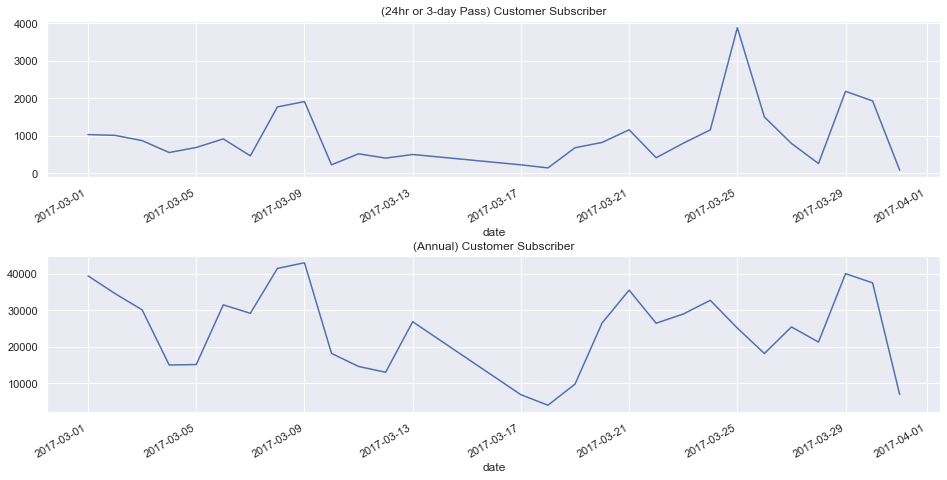

In [401]:
fig, ax = plt.subplots(2, figsize=(16,8))
fig.subplots_adjust(hspace=0.5)
by_date.iloc[:,0].plot(ax=ax[0], title='(24hr or 3-day Pass) Customer Subscriber');
by_date.iloc[:,1].plot(ax=ax[1], title='(Annual) Customer Subscriber');


In [402]:
by_date.head()
#df.head()

User Type,Customer,Subscriber
date,,
2017-03-01,1027,39374
2017-03-02,1006,34511
2017-03-03,867,30060
2017-03-04,549,14949
2017-03-05,684,15076


In [403]:
count_by_date = df.pivot_table('Start Station ID', aggfunc='count',
                           index='date',)

In [404]:
#count_by_date.head()
#count_by_date.describe
count_by_date.style


,Start Station ID
date,
2017-03-01 00:00:00,40401
2017-03-02 00:00:00,35517
2017-03-03 00:00:00,30927
2017-03-04 00:00:00,15498
2017-03-05 00:00:00,15760
2017-03-06 00:00:00,32344
2017-03-07 00:00:00,29574
2017-03-08 00:00:00,43172
2017-03-09 00:00:00,44866


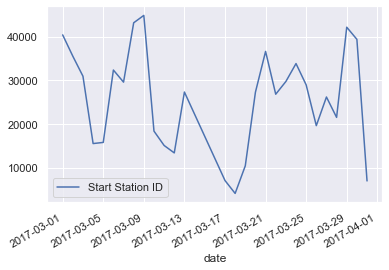

In [405]:
count_by_date.plot()





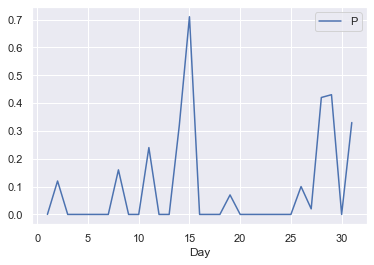

In [406]:
# now print weatherdf
import matplotlib.pyplot as plt
ax = plt.gca()

weatherDf.plot(kind='line',x='Day',y='P',ax=ax)
plt.show()


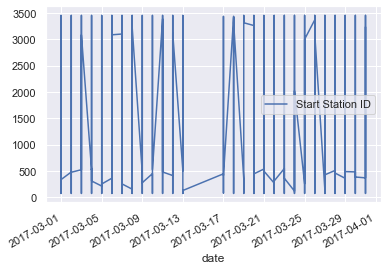

In [407]:
ax = plt.gca()

df.plot(kind='line',x='date',y='Start Station ID',ax=ax)
#df.plot(kind='line',x='Day',y='AvgDP', color='red', ax=ax)

plt.show()

In [408]:
group_by_start_station = (df.groupby(['Start Station ID'])
                    .apply(lambda x: (x['Start Station ID']==519).count())
                    .reset_index(name='count'))

In [409]:
#group_by_start_station['Start Station ID']==519
print(group_by_start_station)


     Start Station ID  count
0                  72   1887
1                  79   1256
2                  82    547
3                  83    567
4                 116   2216
..                ...    ...
609              3452    263
610              3453    324
611              3454    257
612              3455    157
613              3456     26

[614 rows x 2 columns]


In [410]:
print(group_by_start_station['Start Station ID'].values[519])

3348


In [411]:
print(group_by_start_station.nlargest(5, 'count'))

     Start Station ID  count
269               519   9040
250               497   5429
194               435   5276
245               492   5265
168               402   5152


In [412]:
#count_by_date2 = df.pivot_table(index=['Start Station Name','Start Station ID'],aggfunc=np.sum,values=['mycount'])

#countdate2 = df.pivot_table(df.loc[df['Start Station ID']=='519'], index='date', aggfunc='count')

countsdate2 = df['Start Station ID'].value_counts(normalize=True)

#count_by_date = df.pivot_table('Start Station ID', aggfunc='count',
#                           index='date',)

In [413]:
countdate2 = df
countdate2.head()
#countdate2 == 519
#countsdate2 = df.groupby('Start Station ID').filter(lambda x: x.values[519]==519)


#count_by_date2 = countdate2.eq('Start Station ID' == 519).pivot_table('Start Station ID', aggfunc='count',
#                           index='date',)

df6 = countdate2.loc['2017-03-08']


In [414]:
#df6['Start Station ID']==519
df6.shape

(43172, 19)

In [415]:
onecountNoRain=0
for index, row in df6.iterrows():
    if row['Start Station ID'] == 519:  # Pershing Square North
        #print(row['Start Time'], row['Start Station Name'])
        onecountNoRain = onecountNoRain + 1

In [416]:
onecountNoRain

542

In [417]:
df6 = countdate2.loc['2017-03-17']

onecountRain=0
for index, row in df6.iterrows():
    if row['Start Station ID'] == 519:  # Pershing Square North
        #print(row['Start Time'], row['Start Station Name'])
        onecountRain = onecountRain + 1

In [418]:
onecountRain

129